<a href="https://colab.research.google.com/github/AmiraliLalehpour/MMAI-823-Final-Project/blob/main/Earnings_Momentum_Strategy_Finance_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install yfinance pandas matoplotlib


ERROR: Could not find a version that satisfies the requirement matoplotlib (from versions: none)
ERROR: No matching distribution found for matoplotlib


In [4]:

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [5]:


# Define the stock symbols
symbols = ["GME", "AMC"]

# Define the date range
start_date = "2020-09-29"
end_date = "2021-09-29"

# Fetch historical data for all symbols
data = yf.download(symbols, start=start_date, end=end_date)

[*********************100%***********************]  2 of 2 completed


Actual Results For This Time Period

In [6]:
actual_returns = data["Close"].iloc[-1]/data["Close"].iloc[0] - 1

print("Actual Returns:")

for symbol, return_value in actual_returns.items():

  print(f"{symbol}: {return_value:.2%}")



Actual Returns:
AMC: 661.11%
GME: 1625.60%


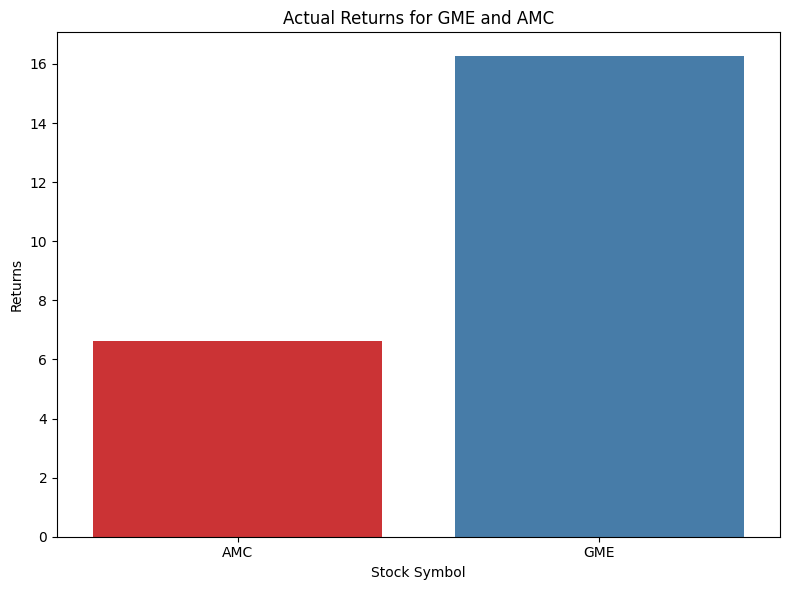

In [7]:

# Create a bar plot for actual returns
plt.figure(figsize=(8, 6))
sns.barplot(x=actual_returns.index, y=actual_returns.values, palette='Set1')
plt.title('Actual Returns for GME and AMC')
plt.ylabel('Returns')
plt.xlabel('Stock Symbol')
plt.xticks(ticks=np.arange(len(actual_returns)), labels=actual_returns.index)
plt.tight_layout()
plt.show()

In [8]:

#These are the actual results for GMC and AMC for the year starting in 2020 till 2021.

#Our goal is to comparing the real results with different strategies and to see if we can beat it.

In [9]:

data.head()

Adj Close         Close          High           Low          Open  \
                 AMC     GME   AMC     GME   AMC     GME   AMC     GME   AMC   
Date                                                                           
2020-09-29      4.86  2.5875  4.86  2.5875  4.94  2.6625  4.75  2.4825  4.88   
2020-09-30      4.71  2.5500  4.71  2.5500  4.95  2.6900  4.70  2.5150  4.80   
2020-10-01      4.65  2.4425  4.65  2.4425  4.80  2.5625  4.63  2.4225  4.78   
2020-10-02      4.65  2.3475  4.65  2.3475  4.66  2.4450  4.42  2.3250  4.48   
2020-10-05      4.13  2.3650  4.13  2.3650  4.36  2.3975  4.05  2.3125  4.30   

                     Volume            
               GME      AMC       GME  
Date                                   
2020-09-29  2.5000  2520000  20950400  
2020-09-30  2.5625  2515400  24316000  
2020-10-01  2.5225  3223800  18216400  
2020-10-02  2.3450  3576000  17362000  
2020-10-05  2.3600  9468800  11220000

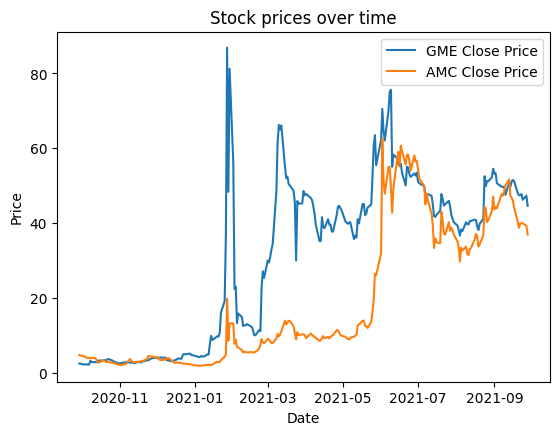

In [10]:

#Visualizing

plt.figure(figsize = (14,10))

#Line plots of stock prices over time. Note: this is actual price over that time period, which has been downloaded from Yahoo Finance

plt.subplot(2,2,1)
for symbol in symbols:
  plt.plot(data['Close'][symbol], label=f'{symbol} Close Price')

plt.title("Stock prices over time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

Earning Momentum Strategy

In [26]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define stock symbols and date range
symbols = ["GME", "AMC"]
start_date = "2020-09-29"
end_date = "2021-09-29"

# Download stock price data from Yahoo Finance
data = yf.download(symbols, start=start_date, end=end_date)

[*********************100%***********************]  2 of 2 completed


In [27]:
# Placeholder function for fetching EPS data
def fetch_eps_data(symbol, start_date, end_date):
    # Implement your data fetching logic here and return a DataFrame with 'date' and 'eps' columns
    # For simplicity, I'll create a placeholder DataFrame
    date_range = pd.date_range(start=start_date, end=end_date, freq='Q')
    eps_values = np.random.uniform(low=1.0, high=3.0, size=len(date_range))
    eps_data = pd.DataFrame({'date': date_range, 'eps': eps_values})
    return eps_data

# Fetch EPS data for each symbol
eps_data = {}
for symbol in symbols:
    eps_data[symbol] = fetch_eps_data(symbol, start_date, end_date)


In [28]:
# Merge EPS data into the data variable based on the date
for symbol in symbols:
    data[('EPS', symbol)] = eps_data[symbol].set_index('date')['eps']

# Calculate percentage change in EPS for the specified time period
for symbol in symbols:
    data[('EPS_Change', symbol)] = data[('EPS', symbol)].pct_change()


In [34]:
# Calculate average EPS and divide by 3
for symbol in symbols:
    avg_eps = data[('EPS', symbol)].mean()
    adjusted_avg_eps = avg_eps / 3
    print(f"Adjusted Average EPS for {symbol}: {adjusted_avg_eps:.2f}")

#Divided it by 3 because, there were 3 quarters of earnings during that time

Adjusted Average EPS for GME: 0.67
Adjusted Average EPS for AMC: 0.76


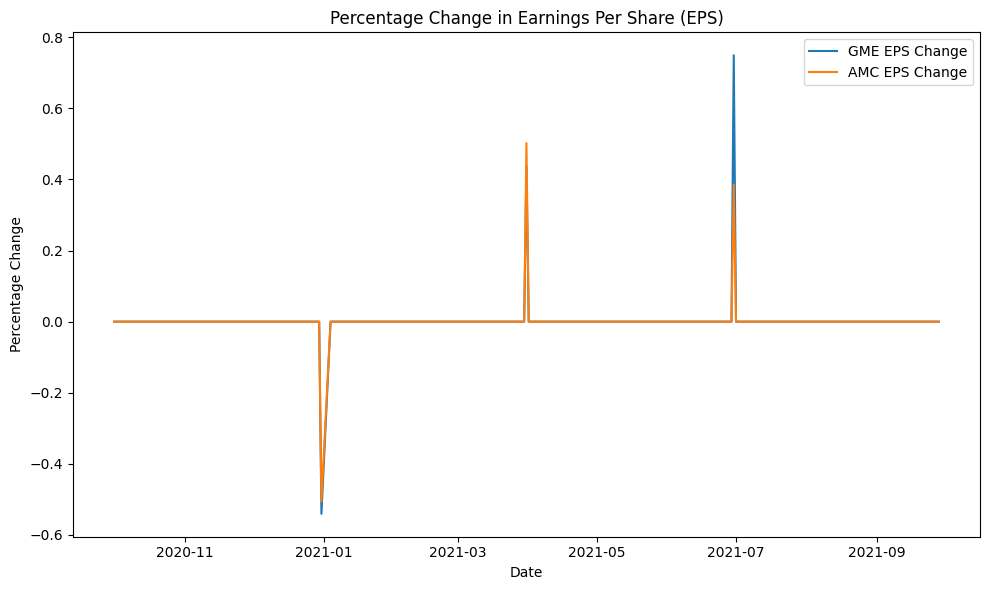

In [35]:
# Plot percentage change in EPS
plt.figure(figsize=(10, 6))
for symbol in symbols:
    plt.plot(data.index, data[('EPS_Change', symbol)], label=f'{symbol} EPS Change')
plt.title('Percentage Change in Earnings Per Share (EPS)')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()
plt.tight_layout()
plt.show()


In [43]:
# Define buy and sell thresholds
buy_threshold = 0.1  # Example: Buy when EPS change is above 10%
sell_threshold = -0.1  # Example: Sell when EPS change is below -10%


In [46]:
# Generate signals
for symbol in symbols:
    data[('Signal', symbol)] = 0
    data.loc[data[('EPS_Change', symbol)] > buy_threshold, ('Signal', symbol)] = 1
    data.loc[data[('EPS_Change', symbol)] < sell_threshold, ('Signal', symbol)] = -1



In [47]:
# Calculate strategy returns
for symbol in symbols:
    data[('Strategy_Returns', symbol)] = data[('Signal', symbol)].shift(1) * data['Close'][symbol].pct_change()


In [48]:
# Calculate cumulative strategy returns
for symbol in symbols:
    data[('Cumulative_Strategy_Returns', symbol)] = (1 + data[('Strategy_Returns', symbol)]).cumprod()


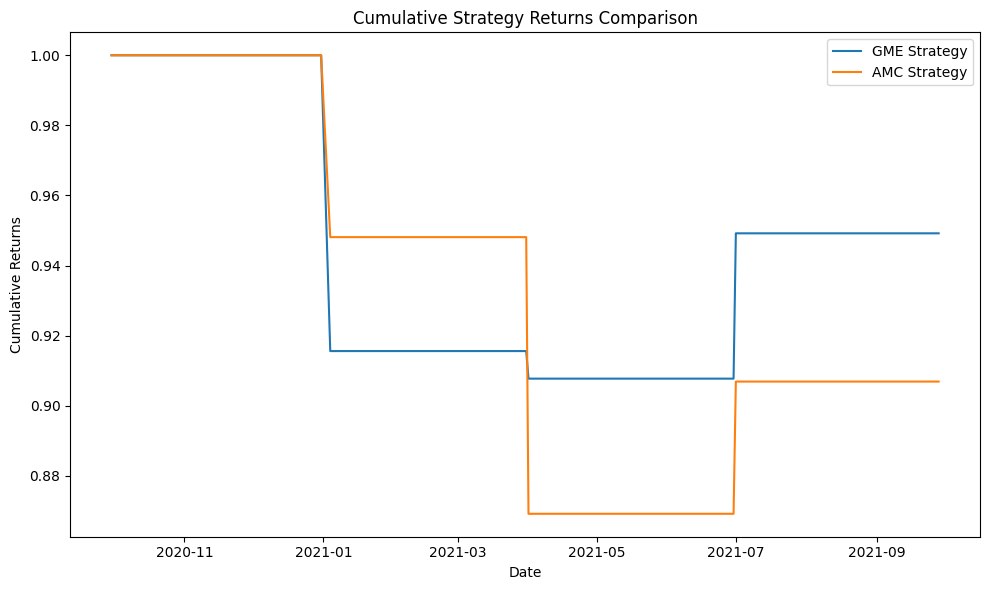

In [49]:
# Visualize cumulative strategy returns
plt.figure(figsize=(10, 6))
for symbol in symbols:
    plt.plot(data.index, data[('Cumulative_Strategy_Returns', symbol)], label=f'{symbol} Strategy')
plt.title('Cumulative Strategy Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.tight_layout()
plt.show()

In [51]:
# Calculate cumulative actual returns
for symbol in symbols:
    data[('Cumulative_Actual_Returns', symbol)] = (1 + data['Close'][symbol].pct_change()).cumprod()


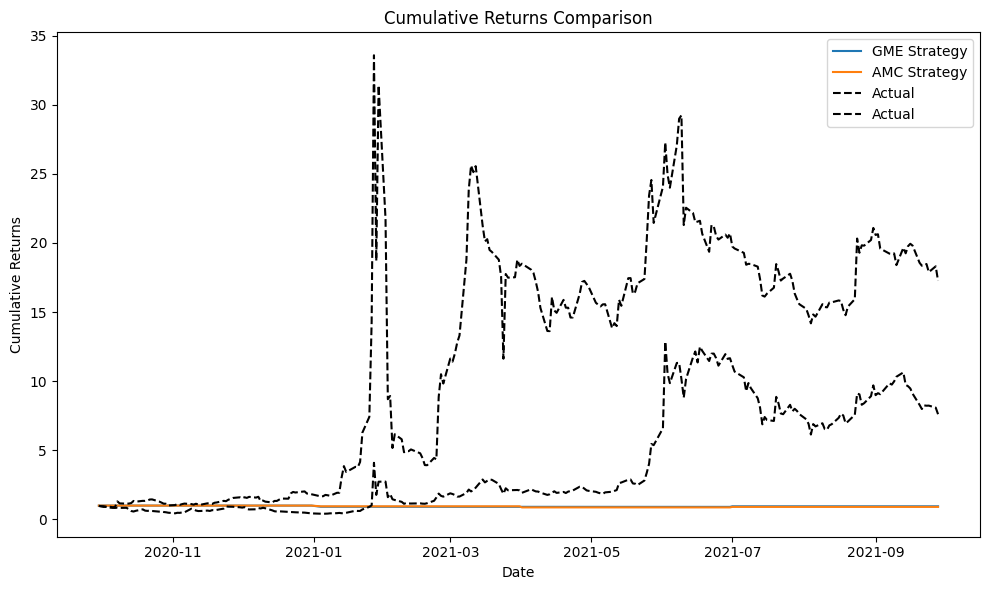

In [53]:
# Visualize cumulative actual returns and strategy returns
plt.figure(figsize=(10, 6))
for symbol in symbols:
    plt.plot(data.index, data[('Cumulative_Strategy_Returns', symbol)], label=f'{symbol} Strategy')
plt.plot(data.index, data['Cumulative_Actual_Returns'], label='Actual', color='black', linestyle='dashed')
plt.title('Cumulative Returns Comparison')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.tight_layout()
plt.show()


In [54]:
#Pale in comparison to reality